# Assignment 2 Distribution Grid Simulation

## Notebook B

### Task 1

- Create with pandapower the distribution grid depicted below in figure 1
- Ressources:
    - online docs https://pandapower.readthedocs.io/en/latest/index.html
- the lines, loads, and gens are qualitatively the same as in notebook A! Just the layout changed!

### Task 2

- Load the Dataset B for generation and load and perform a time series simulation.
- Ressources:
    - https://pandapower.readthedocs.io/en/latest/timeseries.html

### Task 3

- Explore how the allocation of the loads and generating elements influence the lines and external grid
- Now focus more on how to reasonably quantify the "goodness" of specific allocations, especially with regard line loading and external grid power


### Task 4
- upload your optimized allocations on moodle, use the format specified in the evaluation notebook

In [1]:
import pandapower as pp
import pandapower.plotting as plot
import pandas as pd
import random
import numba
from utils import run_time_series

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
# create empty net
net = pp.create_empty_network()

# create buses
pp.create_bus(net, vn_kv=20.0, name="Bus 1", index=1)
#b2 = pp.create_bus(net, vn_kv=0.4, name="Bus 2")

for p in range(2,19):
    
    pp.create_bus(net, vn_kv=0.4, name="Bus "+ str(p),index=p)
    pp.create_load(net, bus=p, p_mw=0.01, q_mvar=0.005, name="Load")
    pp.create_sgen(net, bus=p, p_mw=0.01, q_mvar=0.005, name="Load")
        
        

# create bus elements
pp.create_ext_grid(net, bus=1, vm_pu=1.02, name="Grid Connection")


# create branch elements
tid = pp.create_transformer(
    net, hv_bus=1, lv_bus=2, std_type="0.4 MVA 20/0.4 kV", name="Trafo"
)

pp.create_line(
    net, from_bus=2, to_bus=3, length_km=0.100, name="Line", std_type="NAYY 4x50 SE"
)

pp.create_line(
    net, from_bus=2, to_bus=10, length_km=0.100, name="Line", std_type="NAYY 4x50 SE"
)

for i in range(3,9):
    pp.create_line(
        net, from_bus=i, to_bus=i+1, length_km=0.100, name="Line", std_type="NAYY 4x50 SE"
    )
    
for i in range(10,18):
    pp.create_line(
        net, from_bus=i, to_bus=i+1, length_km=0.100, name="Line", std_type="NAYY 4x50 SE"
    )

No or insufficient geodata available --> Creating artificial coordinates. This may take some time


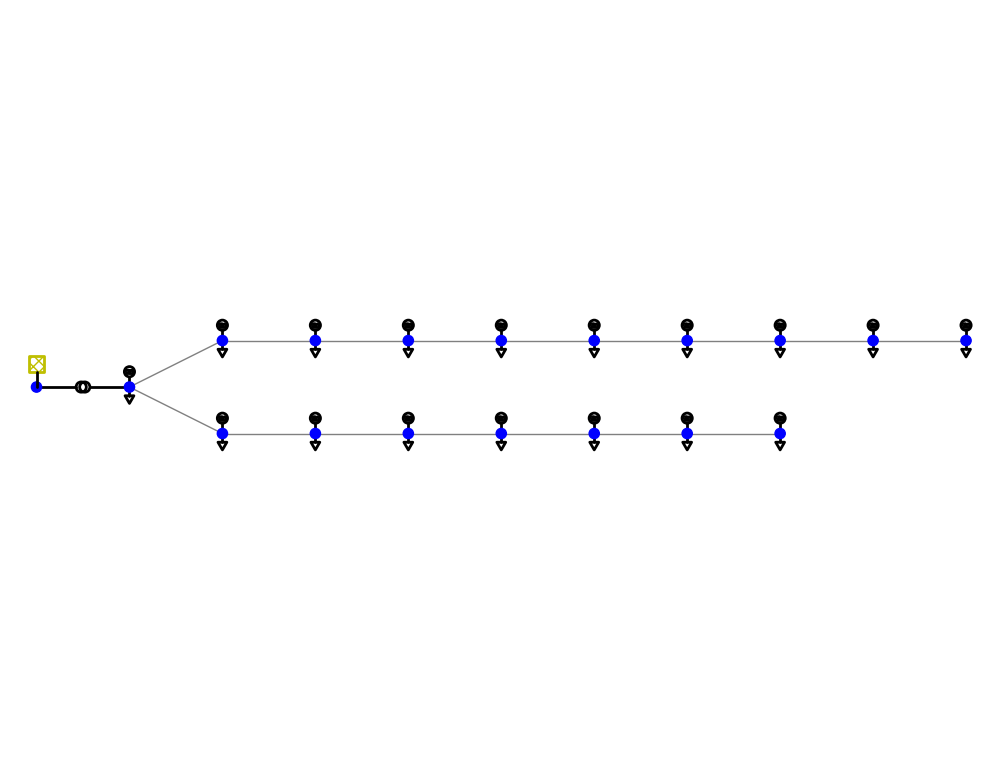

<Axes: >

In [3]:
plot.simple_plot(net, plot_loads=True, plot_sgens=True)

In [4]:
pp.runpp(net)
net.res_ext_grid

numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)



,p_mw,q_mvar
0,0.001405,-0.000017


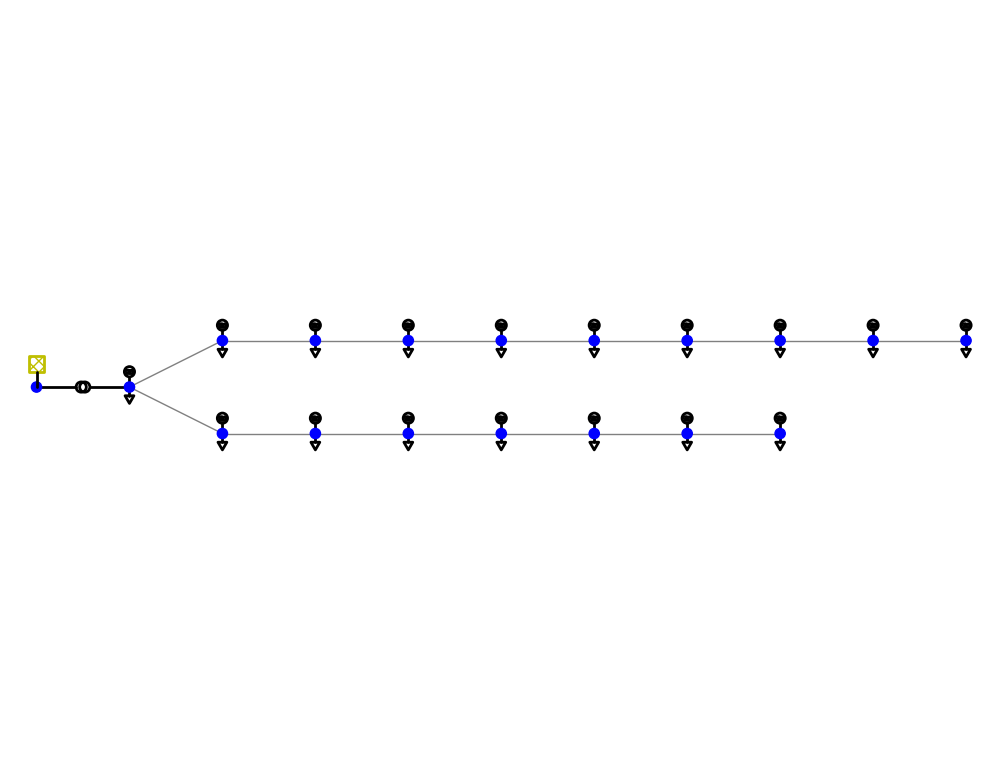

In [5]:
gen_data = pd.read_csv("GenerationData_B.csv", index_col=0)
gen_data.columns.name = "household"
load_data = pd.read_csv("LoadData_B.csv", index_col=0)
load_data.columns.name = "household"
load_data

household,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.000166,0.000163,0.000162,0.000136,0.000177,0.000401,0.000175,0.000154,0.000151,0.000172,0.000173,1.201822e-04,0.000169,0.000161,0.000204,0.000201,0.000178
1,0.000161,0.000170,0.000147,0.000179,0.000162,0.000166,0.000270,0.000146,0.000149,0.000164,0.000141,1.595255e-04,0.000180,0.000140,0.000207,0.000213,0.000188
2,0.000172,0.000161,0.000161,0.000175,0.000239,0.000179,0.000163,0.000151,0.000151,0.000146,0.000143,1.524271e-04,0.000183,0.000199,0.000203,0.000204,0.000166
3,0.000162,0.000181,0.000148,0.000166,0.000197,0.000172,0.000179,0.000154,0.000159,0.000149,0.000147,1.791680e-04,0.000189,0.000156,0.000200,0.000199,0.000182
4,0.000168,0.000173,0.000159,0.000158,0.000156,0.000177,0.000169,0.000142,0.000148,0.000130,0.000138,1.390596e-04,0.000173,0.000163,0.000203,0.000180,0.000182
5,0.000171,0.000323,0.000162,0.000284,0.000169,0.000181,0.000150,0.000163,0.000287,0.000183,0.000169,1.677572e-04,0.000210,0.000156,0.000216,0.000205,0.000191
6,0.000167,0.000180,0.000101,0.000094,0.000198,0.000186,0.000163,0.000140,0.000170,0.000236,0.000279,9.238272e-05,0.000114,0.000105,0.000179,0.000224,0.000097
7,0.000131,0.000143,0.000182,0.000097,0.000190,0.000186,0.000106,0.000129,0.000206,0.000113,0.001041,2.908175e-04,0.000357,0.000329,0.000345,0.000293,0.000258
8,0.000120,0.000192,0.000066,0.000058,0.000231,0.000199,0.000111,0.000177,0.000211,0.000011,0.000489,4.350185e-04,0.000507,0.000465,0.000301,0.000348,0.000395
9,0.000279,0.000225,0.000444,0.000277,0.000264,0.000258,0.000282,0.000462,0.000239,0.000413,0.000155,4.019233e-04,0.000418,0.000453,0.000313,0.000337,0.000370


In [6]:
gen_order =[1, 15, 8, 3, 10, 16, 11, 2, 14, 6, 5, 9, 7, 13, 0, 12, 4]
load_order=[9, 13, 16, 10, 3, 14, 5, 11, 6, 4, 2, 12, 7, 0, 1, 15, 8]


In [7]:
def time_series(gen_order,load_order):
    gen_order1=pd.Index(gen_order)
    load_order1=pd.Index(load_order)
    
    res_ext, res_lines = run_time_series(gen_data,
                                         load_data,
                                         net,
                                         index_order_gen=gen_order1,
                                         index_order_load=load_order1)
    
    result =res_lines.max(axis=1).sum()
    
    return result

In [8]:
def population(gen_order,load_order):
    gpop=[]
    lpop=[]
    for i in range(10):
        g=list(gen_order)
        l=list(load_order)
        random.shuffle(gen_order)
        random.shuffle(load_order)
        gpop.append(g)
        lpop.append(l)

    return gpop,lpop

In [9]:
def Calculatefitness():
    
    line_load=99999
    fitness=[]
    for i in range(len(gpop)):
        d=time_series(gpop[i],lpop[i])
        if (d < line_load):
            line_load=d
            best_g= gpop[i]
            best_l= lpop[i]
        fitness.append(1/((d)**3 +1))
        print(i)
    return best_g,best_l,fitness
def NormalizeFitness(fitness):
    sum=0
    for i in range(len(fitness)):
        sum+=fitness[i]
    for i in range(len(fitness)):
        fitness[i]=fitness[i]/sum

In [10]:
def crossover(order1,order2):
    
    start = random.randint(0, len(order1) - 1)
    end = random.randint(start + 1, len(order1))
    new_order = order1[start:end]
    
    for i in order2:
        if i not in new_order:
            new_order.append(i)
    
    return new_order





    

In [11]:
def pick_one(lst, prob):
    index = 0
    r = random.uniform(0, 1)
    while r > 0:
        r -= prob[index]
        index += 1
    index -= 1
    return lst[index][:]


In [12]:
def mutate(order, mutation_rate):
    total = len(order)
    
    for i in range(total):
        if random.random() < mutation_rate:
            index_a = random.randint(0, len(order) - 1)
            index_b = (index_a + 1) % total
            order[index_a], order[index_b] = order[index_b], order[index_a]


In [13]:
def NextGen():
    new_gpop=[]
    new_lpop=[]
    for i in range(len(new_gpop)):
        orderA_g=pick_one(new_gpop,fitness)
        orderB_g=pick_one(new_gpop,fitness)
        orderA_l=pick_one(new_lpop,fitness)
        orderB_l=pick_one(new_lpop,fitness)
        
        order_g=crossover(orderA_g,orderB_g)
        order_l=crossover(orderA_l,orderB_l)
        
        mutate(order_g,0.1)
        mutate(order_l,0.1)
        
        new_gpop[i]=order_g
        new_lpop[i]=order_l
    gpop=new_gpop
    lpop=new_lpop

In [15]:
for i in range(10):
    gpop,lpop=population(gen_order,load_order)
    Gen_order,Load_order,fitness=Calculatefitness()
    NormalizeFitness(fitness)
    NextGen()
    
    
    
    

No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps

  4%|███▍                                                                               | 1/24 [00:00<00:02,  9.52it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 23.79it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


0



  4%|███▍                                                                               | 1/24 [00:00<00:03,  6.48it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.91it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


1



  4%|███▍                                                                               | 1/24 [00:00<00:03,  6.20it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.20it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


2



  4%|███▍                                                                               | 1/24 [00:00<00:02,  8.41it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 20.66it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


3



  4%|███▍                                                                               | 1/24 [00:00<00:02,  7.69it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.68it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


4



  4%|███▍                                                                               | 1/24 [00:00<00:03,  6.90it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 19.71it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


5



  4%|███▍                                                                               | 1/24 [00:00<00:04,  5.13it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 18.42it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


6



  4%|███▍                                                                               | 1/24 [00:00<00:04,  5.31it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 17.34it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


7



  4%|███▍                                                                               | 1/24 [00:00<00:04,  5.37it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 16.91it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


8



  4%|███▍                                                                               | 1/24 [00:00<00:05,  4.26it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 16.61it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


9



  4%|███▍                                                                               | 1/24 [00:00<00:05,  4.34it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 16.47it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


0



  4%|███▍                                                                               | 1/24 [00:00<00:05,  4.29it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 16.36it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


1



  4%|███▍                                                                               | 1/24 [00:00<00:06,  3.59it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 14.91it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


2



  4%|███▍                                                                               | 1/24 [00:00<00:05,  4.02it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 15.89it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


3



  4%|███▍                                                                               | 1/24 [00:00<00:06,  3.46it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.16it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


4



  4%|███▍                                                                               | 1/24 [00:00<00:07,  2.88it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.85it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


5



  4%|███▍                                                                               | 1/24 [00:00<00:07,  3.03it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 13.00it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


6



  4%|███▍                                                                               | 1/24 [00:00<00:08,  2.65it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.78it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


7



  4%|███▍                                                                               | 1/24 [00:00<00:08,  2.78it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 12.77it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


8



  4%|███▍                                                                               | 1/24 [00:00<00:09,  2.34it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.99it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


9



  4%|███▍                                                                               | 1/24 [00:00<00:10,  2.29it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.55it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


0



  4%|███▍                                                                               | 1/24 [00:00<00:10,  2.14it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.09it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


1



  4%|███▍                                                                               | 1/24 [00:00<00:12,  1.84it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.03it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


2



  4%|███▍                                                                               | 1/24 [00:00<00:11,  2.02it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 11.11it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


3



  4%|███▍                                                                               | 1/24 [00:00<00:12,  1.89it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.42it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


4



  4%|███▍                                                                               | 1/24 [00:00<00:13,  1.76it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00, 10.40it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


5



  4%|███▍                                                                               | 1/24 [00:00<00:14,  1.54it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.92it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


6



  4%|███▍                                                                               | 1/24 [00:00<00:16,  1.39it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.95it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


7



  4%|███▍                                                                               | 1/24 [00:00<00:16,  1.38it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.26it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


8



  4%|███▍                                                                               | 1/24 [00:00<00:13,  1.67it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.31it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


9



  4%|███▍                                                                               | 1/24 [00:00<00:15,  1.45it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.62it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


0



  4%|███▍                                                                               | 1/24 [00:00<00:15,  1.52it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  9.87it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


1



  4%|███▍                                                                               | 1/24 [00:00<00:15,  1.46it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:02<00:00,  8.77it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


2



  4%|███▍                                                                               | 1/24 [00:00<00:17,  1.28it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.96it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


3



  4%|███▍                                                                               | 1/24 [00:00<00:17,  1.31it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.45it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


4



  4%|███▍                                                                               | 1/24 [00:01<00:23,  1.00s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.42it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


5



  4%|███▍                                                                               | 1/24 [00:00<00:22,  1.04it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.78it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


6



  4%|███▍                                                                               | 1/24 [00:00<00:22,  1.02it/s]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.09it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


7



  4%|███▍                                                                               | 1/24 [00:01<00:24,  1.06s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  6.85it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


8



  4%|███▍                                                                               | 1/24 [00:01<00:26,  1.13s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.02it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


9



  4%|███▍                                                                               | 1/24 [00:01<00:26,  1.17s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  6.89it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


0



  4%|███▍                                                                               | 1/24 [00:01<00:24,  1.04s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  7.07it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


1



  4%|███▍                                                                               | 1/24 [00:01<00:24,  1.08s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  6.55it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


2



  4%|███▍                                                                               | 1/24 [00:01<00:25,  1.13s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  6.78it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


3



  4%|███▍                                                                               | 1/24 [00:01<00:25,  1.11s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  6.37it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


4



  4%|███▍                                                                               | 1/24 [00:01<00:27,  1.18s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  6.14it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


5



  4%|███▍                                                                               | 1/24 [00:01<00:28,  1.26s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  6.06it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


6



  4%|███▍                                                                               | 1/24 [00:01<00:29,  1.27s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  6.08it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


7



  4%|███▍                                                                               | 1/24 [00:01<00:36,  1.60s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.81it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


8



  4%|███▍                                                                               | 1/24 [00:01<00:32,  1.40s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.82it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


9



  4%|███▍                                                                               | 1/24 [00:01<00:31,  1.35s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:03<00:00,  6.02it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


0



  4%|███▍                                                                               | 1/24 [00:01<00:32,  1.39s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.52it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


1



  4%|███▍                                                                               | 1/24 [00:01<00:34,  1.50s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.42it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


2



  4%|███▍                                                                               | 1/24 [00:01<00:35,  1.55s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.39it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


3



  4%|███▍                                                                               | 1/24 [00:01<00:35,  1.56s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.44it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


4



  4%|███▍                                                                               | 1/24 [00:01<00:33,  1.48s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.79it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


5



  4%|███▍                                                                               | 1/24 [00:01<00:36,  1.58s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.59it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


6



  4%|███▍                                                                               | 1/24 [00:01<00:41,  1.79s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  4.91it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


7



  4%|███▍                                                                               | 1/24 [00:01<00:43,  1.88s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  4.89it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


8



  4%|███▍                                                                               | 1/24 [00:01<00:43,  1.91s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  4.88it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


9



  4%|███▍                                                                               | 1/24 [00:01<00:39,  1.70s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.28it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


0



  4%|███▍                                                                               | 1/24 [00:01<00:40,  1.75s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.17it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


1



  4%|███▍                                                                               | 1/24 [00:02<00:47,  2.05s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.49it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


2



  4%|███▍                                                                               | 1/24 [00:01<00:45,  1.97s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.60it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


3



  4%|███▍                                                                               | 1/24 [00:02<00:46,  2.00s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.63it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


4



  4%|███▍                                                                               | 1/24 [00:03<01:10,  3.09s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.05it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


5



  4%|███▍                                                                               | 1/24 [00:02<01:01,  2.69s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.01it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


6



  4%|███▍                                                                               | 1/24 [00:02<00:47,  2.06s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.70it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


7



  4%|███▍                                                                               | 1/24 [00:02<00:47,  2.06s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.56it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


8



  4%|███▍                                                                               | 1/24 [00:02<00:54,  2.35s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.02it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


9



  4%|███▍                                                                               | 1/24 [00:02<00:58,  2.55s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.87it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


0



  4%|███▍                                                                               | 1/24 [00:02<00:57,  2.51s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:05<00:00,  4.01it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


1



  4%|███▍                                                                               | 1/24 [00:02<01:00,  2.62s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.76it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


2



  4%|███▍                                                                               | 1/24 [00:02<00:57,  2.52s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.83it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


3



  4%|███▍                                                                               | 1/24 [00:02<00:58,  2.56s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.97it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


4



  4%|███▍                                                                               | 1/24 [00:02<01:01,  2.66s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.84it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


5



  4%|███▍                                                                               | 1/24 [00:02<01:05,  2.85s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.63it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


6



  4%|███▍                                                                               | 1/24 [00:02<01:05,  2.84s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.73it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


7



  4%|███▍                                                                               | 1/24 [00:02<01:07,  2.91s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.59it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


8



  4%|███▍                                                                               | 1/24 [00:03<01:09,  3.00s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.58it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


9



  4%|███▍                                                                               | 1/24 [00:02<01:05,  2.85s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.58it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


0



  4%|███▍                                                                               | 1/24 [00:03<01:13,  3.20s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.44it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


1



  4%|███▍                                                                               | 1/24 [00:03<01:10,  3.05s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.50it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


2



  4%|███▍                                                                               | 1/24 [00:03<01:10,  3.05s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.52it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


3



  4%|███▍                                                                               | 1/24 [00:02<01:07,  2.95s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.69it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


4



  4%|███▍                                                                               | 1/24 [00:03<01:09,  3.01s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.60it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


5



  4%|███▍                                                                               | 1/24 [00:03<01:11,  3.10s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.59it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


6



  4%|███▍                                                                               | 1/24 [00:03<01:12,  3.15s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.33it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


7



  4%|███▍                                                                               | 1/24 [00:03<01:18,  3.43s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.20it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


8



  4%|███▍                                                                               | 1/24 [00:03<01:23,  3.61s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.04it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


9



  4%|███▍                                                                               | 1/24 [00:03<01:23,  3.61s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.11it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


0



  4%|███▍                                                                               | 1/24 [00:03<01:24,  3.67s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.03it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


1



  4%|███▍                                                                               | 1/24 [00:03<01:27,  3.81s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:07<00:00,  3.03it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


2



  4%|███▍                                                                               | 1/24 [00:03<01:29,  3.88s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:08<00:00,  2.90it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


3



  4%|███▍                                                                               | 1/24 [00:03<01:30,  3.94s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:08<00:00,  2.95it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


4



  4%|███▍                                                                               | 1/24 [00:04<01:33,  4.07s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:08<00:00,  2.85it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


5



  4%|███▍                                                                               | 1/24 [00:04<01:36,  4.18s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:08<00:00,  2.82it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


6



  4%|███▍                                                                               | 1/24 [00:04<01:36,  4.21s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:08<00:00,  2.79it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


7



  4%|███▍                                                                               | 1/24 [00:04<01:37,  4.25s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:09<00:00,  2.66it/s]
No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps


8



  4%|███▍                                                                               | 1/24 [00:04<01:37,  4.25s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:08<00:00,  2.73it/s]

9


In [16]:
Gen_order

[4, 9, 5, 6, 10, 12, 11, 13, 7, 0, 8, 3, 14, 2, 15, 16, 1]

In [17]:
[5, 7, 4, 3, 0, 11, 14, 6, 10, 1, 15, 16, 8, 9, 13, 2, 12]

[5, 7, 4, 3, 0, 11, 14, 6, 10, 1, 15, 16, 8, 9, 13, 2, 12]

In [18]:
Load_order

[12, 3, 4, 14, 0, 1, 9, 15, 13, 10, 8, 6, 7, 2, 11, 5, 16]

In [19]:
[2, 8, 0, 6, 14, 7, 16, 11, 13, 5, 10, 12, 15, 4, 3, 9, 1]

[2, 8, 0, 6, 14, 7, 16, 11, 13, 5, 10, 12, 15, 4, 3, 9, 1]

In [20]:
fitness

[0.09417025677801392,
 0.1006793246179208,
 0.09356192448479064,
 0.08448478641655871,
 0.08186663357657423,
 0.09295507353928516,
 0.09967469510323691,
 0.11688664794574538,
 0.1091055837709579,
 0.12661507376691633]

In [21]:
time_series(Gen_order,Load_order)

No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps

  4%|███▍                                                                               | 1/24 [00:04<01:35,  4.15s/it]numba cannot be imported and numba functions are disabled.
Probably the execution is slow.
Please install numba to gain a massive speedup.
(or if you prefer slow execution, set the flag numba=False to avoid this warning!)


100%|██████████████████████████████████████████████████████████████████████████████████| 24/24 [00:08<00:00,  2.79it/s]


88.74863644567647

In [22]:
# plot res lines in one plot with legend
ax=res_lines_1['0'].plot(label="results order 1",legend=True, title="Line Loading", xlabel="Time of the Day [h]", ylabel="Line Loading [%]", ylim=(0, 1.1 * res_lines_1.max().max()))
res_lines_2['0'].plot(ax=ax, legend=True, title="Line Loading", xlabel="Time of the Day [h]", ylabel="Line Loading [%]", ylim=(0, 1.1 * res_lines_1.max().max()),label="results order 2")

NameError: name 'res_lines_1' is not defined